# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [445]:
import numpy as np
import matplotlib.pyplot as plt

def deriv(f, x, h):
    return (-1.5 * f(x) + 2 * f(x + h) - 0.5 * f(x + 2 * h))/h 

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [446]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


С каждым шагом ошибка квадратично убывает.

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [447]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

def deriv0(f, x, h):
    return (f(x + h) - f(x)) / h

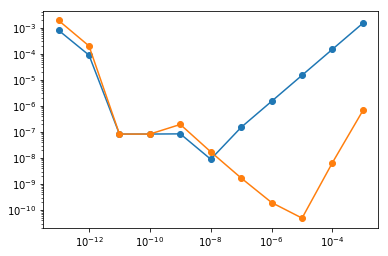

In [448]:
x = 1
plt.xscale('log')
plt.yscale('log')
err0 = []
err1 = []
for h in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]:
    err0.append(np.abs(deriv0(f, x, h) - fder(x)))
for h in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]:
    err1.append(np.abs(deriv(f, x, h) - fder(x)))
plt.plot([1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13], err0, '-o')
plt.plot([1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13], err1, '-o')

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [449]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


Ошибка завит от высших степеней x и пропорциональна h

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [450]:
 def midpoint_rule(f, a, b, eps):
    n = 1
    error = np.inf
    y = np.inf
    while eps < error:
        
        x_n = (b - a) / n # длина отрезка
        y_n = 0 # высота
        
        for i in range(n):
            y_n += f(x_n * i + x_n / 2 + a) # так чтобы функция проходила через середину верхнейц грани прямоугольника
        y_n *= x_n      
        
        error = np.abs(y - y_n) # считаем ошибку
        
        n *= 2
        y = y_n
        
        
        print('n =', n, error)
    return y_n

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [451]:
def f(x):
    return np.sin(x)

In [452]:
a = 0
b = np.pi
eps = 1e-5

In [453]:
print(midpoint_rule(f, a, b, eps))

n = 2 inf
n = 4 0.9201511845106101
n = 8 0.1690971631251208
n = 16 0.03943522035493441
n = 32 0.009692707431178338
n = 64 0.0024129618580186474
n = 128 0.0006026045815636927
n = 256 0.00015061144246475422
n = 512 3.765037980452135e-05
n = 1024 9.412439910150283e-06
2.0000031374661877


Совпадает с реальным значением. Зависимость ошибки $N^{-2}$


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [454]:
 def midpoint_rule(f, a, b, eps): # просто потворим функию
    n = 1
    error = np.inf
    y = np.inf
    while eps < error:
        
        x_n = (b - a) / n
        y_n = 0
        
        for i in range(n):
            y_n += f(x_n * i + x_n / 2 + a)
        y_n *= x_n      
        
        error = np.abs(y - y_n)
        n *= 2
        y = y_n
        
        
    print('n =', n)
    return y_n

In [455]:
def f(x):
    return np.sin(np.sqrt(x)) / x 

In [456]:
a = 0
b = 1
eps = 1e-4

In [457]:
print(midpoint_rule(f, a, b, eps))

n = 16777216
1.891957289204461


Как на семинаре вычтем из интеграла 1/sqrt(1) и добавим 1/sqrt(1) после чего разложим синус в ряд и полчим 2 берущихся интеграла один из которых будет равен 2

In [458]:
def f(x): 
    return np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x) # второй интеграл

In [459]:
print(midpoint_rule(f, a, b, eps) + 2) # сумма интегралов


n = 64
1.892113005639548
